In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation
from sklearn import metrics 
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

C:\Users\1\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<bound method GaussianNB.partial_fit of GaussianNB(priors=None)>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]]
<bound method GaussianNB.partial_fit of GaussianNB(priors=None)>
[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]


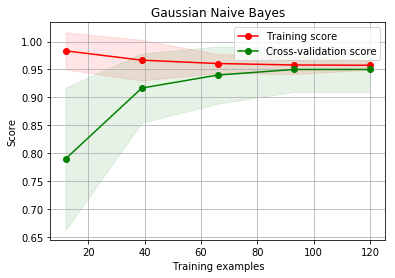

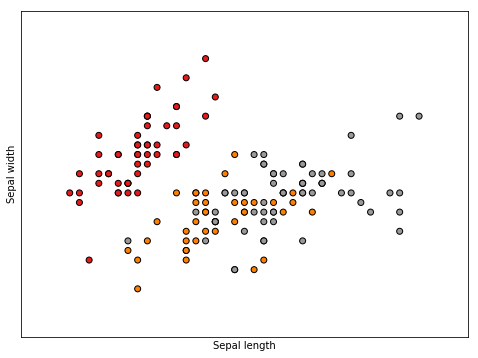

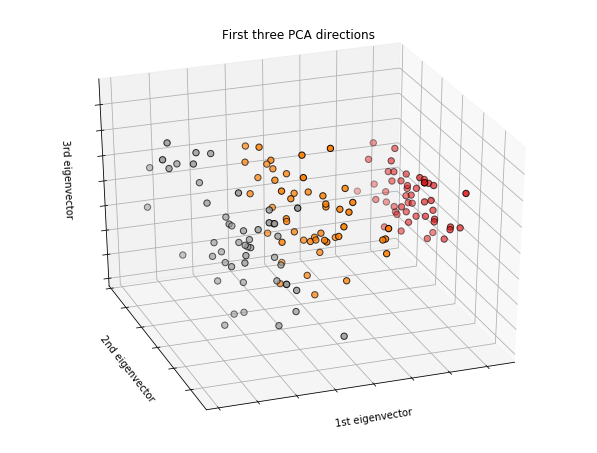

In [2]:
#Iris
#Наивный байесовский классификатор
clf = GaussianNB()
partial = clf.partial_fit
print(partial)

data = load_iris()
X=data.data
Y=data.target
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict(X[:25]))
print((X[:25]))

print(clf.partial_fit)
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Gaussian Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


# График
X = data.data[:, :2]  # берем только первые две функции
Y= data.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


plt.figure(2, figsize=(8, 6))
plt.clf()

# График тренировочных точек
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# построение первых трёх измерений 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [3]:
#Iris
#Линейный дискриминант Фишера
import pandas as pd
clf=LinearDiscriminantAnalysis()
clf.fit(X,Y)
print(np.array(clf.predict([X.loc[1]])))

data = load_iris()
X=data.data
Y=data.target
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict(X[:25]))
print((X[:25]))

print(np.array(clf.predict([X.loc[1]])))
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Linear Discriminant Analysis")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

<bound method GaussianNB.partial_fit of GaussianNB(priors=None)>
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       Passenger

C:\Users\1\Anaconda\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


    Pclass     Fare   Age  Sex
1        1  71.2833  38.0    1
3        1  53.1000  35.0    1
6        1  51.8625  54.0    0
10       3  16.7000   4.0    1
11       1  26.5500  58.0    1
Do they survived?
[0 0 1 1 0]
    Pclass      Fare   Age  Sex
21       2   13.0000  34.0    0
23       1   35.5000  28.0    0
27       1  263.0000  19.0    0
52       1   76.7292  49.0    1
54       1   61.9792  65.0    0
62       1   83.4750  45.0    0
<bound method GaussianNB.partial_fit of GaussianNB(priors=None)>
[0.78947368 0.68421053 0.89473684 0.77777778 0.61111111 0.77777778
 0.61111111 0.61111111 0.88888889 0.83333333]


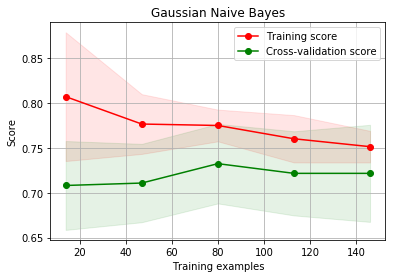

In [4]:
#Titanic
#Наивный байесовский классификатор
clf = GaussianNB()
partial = clf.partial_fit
print(partial)


data = pd.read_csv("titanic.csv", sep = ",")
print(data.describe()) # check if we've loaded right data

data_notna = pd.DataFrame.dropna(data)
print(data_notna.describe())

X = data_notna[["Pclass", "Fare", "Age", "Sex"]]
X.replace("male", 0, True, None, False)
X.replace("female", 1, True, None, False)
print(X[:5])

Y = data_notna["Survived"]

clf = GaussianNB()
clf.fit(X, Y)

print("Do they survived?")
n = 1
print(clf.predict(X[5:10]))
print((X[5:11]))

print(clf.partial_fit)
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Gaussian Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


[1]
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId    Survived      Pclass         Age       SibSp  \
count  

C:\Users\1\Anaconda\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


    Pclass     Fare   Age  Sex
1        1  71.2833  38.0    1
3        1  53.1000  35.0    1
6        1  51.8625  54.0    0
10       3  16.7000   4.0    1
11       1  26.5500  58.0    1
Do they survived?
[0 0 1 1 0]
    Pclass      Fare   Age  Sex
21       2   13.0000  34.0    0
23       1   35.5000  28.0    0
27       1  263.0000  19.0    0
52       1   76.7292  49.0    1
54       1   61.9792  65.0    0
62       1   83.4750  45.0    0
[1]
[0.78947368 0.68421053 0.89473684 0.77777778 0.61111111 0.77777778
 0.61111111 0.61111111 0.88888889 0.83333333]


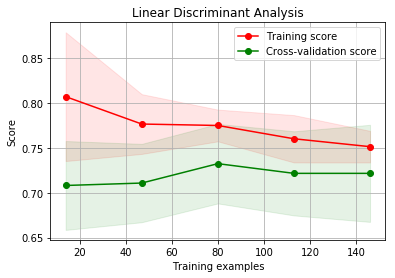

In [5]:
#Titanic
#Линейный дискриминант Фишера
clf=LinearDiscriminantAnalysis()
clf.fit(X,Y)
print(np.array(clf.predict([X.loc[1]])))

data = pd.read_csv("titanic.csv", sep = ",")
print(data.describe()) # check if we've loaded right data

data_notna = pd.DataFrame.dropna(data)
print(data_notna.describe())

X = data_notna[["Pclass", "Fare", "Age", "Sex"]]
X.replace("male", 0, True, None, False)
X.replace("female", 1, True, None, False)
print(X[:5])

Y = data_notna["Survived"]

clf = GaussianNB()
clf.fit(X, Y)

print("Do they survived?")
n = 1
print(clf.predict(X[5:10]))
print((X[5:11]))

print(np.array(clf.predict([X.loc[1]])))
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Linear Discriminant Analysis")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()